In [1]:
Sys.setlocale("LC_ALL", 'Persian')

Warning message in Sys.setlocale("LC_ALL", "Persian"):
"using locale code page other than 65001 ("UTF-8") may cause problems"


[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

In [2]:
options(scipen=999)

In [3]:
library(ggplot2)
library(ggridges)
library(viridis)
library(hrbrthemes)
library(corrgram)
library(ellipse)
library(RColorBrewer)
library(dplyr)
library(treemapify)
library(fastDummies)
library(sf)
library(reshape2)
library(rgdal)
library(rgeos)
library(ggrepel)
library(tidyverse)

Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow


Attaching package: 'ellipse'


The following object is masked from 'package:graphics':

    pairs



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.

Linking to GEOS 3.11.2, GDAL 3.6.2, PROJ 9.2.0; sf_use_s2() is TRUE

Loading required pa

In [4]:
data = readxl::read_excel(path = 'D:\\Visualization-and-Data-Analyzing-2-master\\Iran_Maskan_koll9904.xlsx')

In [6]:
head(data)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000000,36144.58,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080000,12000.00,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000000,204081.63,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240000,40039.55,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750000,9375.00,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500000,55000.00,0,بتوني,1399/04/01,381333


In [7]:
str(data)

tibble [43,133 x 15] (S3: tbl_df/tbl/data.frame)
 $ contrat_number  : chr [1:43133] "19136381" "19140513" "19192568" "19202902" ...
 $ contract_type   : chr [1:43133] "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" ...
 $ state           : chr [1:43133] "زنجان" "زنجان" "زنجان" "زنجان" ...
 $ city            : chr [1:43133] "ابهر" "ابهر" "ابهر" "ابهر" ...
 $ property_type   : chr [1:43133] "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" ...
 $ district_number : num [1:43133] NA NA NA NA NA NA NA NA NA 4 ...
 $ usage_type      : chr [1:43133] "مسکوني" "مسکوني" "مسکوني" "مسکوني" ...
 $ area            : num [1:43133] 83 90 49 80.9 80 ...
 $ percentage      : chr [1:43133] "100" "100" "100" "100" ...
 $ price           : num [1:43133] 3000000 1080000 10000000 3240000 750000 ...
 $ price_per_square: chr [1:43133] "36144.58" "12000.00" "204081.63" "40039.55" ...
 $ building_age    : num [1:43133] 15 9 10 9 10 0 1 6 19 0 ...
 $ skeleton_type   : chr [1:43133] "

In [8]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'

data = data[!is.na(data$contrat_number),]
data$price = as.numeric(data$price) / 1000
data$price_per_square = as.numeric(data$price_per_square) / 1000

In [9]:
data

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000,36.14458,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080,12.00000,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000,204.08163,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240,40.03955,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750,9.37500,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500,55.00000,0,بتوني,1399/04/01,381333
19052937,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,112.00,100,11000,98.21429,1,فلزي,1399/04/01,381869
19053990,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,148.48,100,10650,71.72683,6,بتوني و فلزي,1399/04/01,385174
19056722,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,50.00,100,1900,38.00000,19,بدون اسکلت,1399/04/02,381788


Reading layer `IRN_adm1' from data source 
  `D:\Visualization-and-Data-Analyzing-2-master\adm' using driver `ESRI Shapefile'
Simple feature collection with 31 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 44.04726 ymin: 25.05875 xmax: 63.31746 ymax: 39.77722
Geodetic CRS:  WGS 84


Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "D:\Visualization-and-Data-Analyzing-2-master\adm", layer: "IRN_adm1"
with 31 features
It has 9 fields
Integer64 fields read as strings:  ID_0 ID_1 


Warning message:
"st_centroid assumes attributes are constant over geometries"
Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"


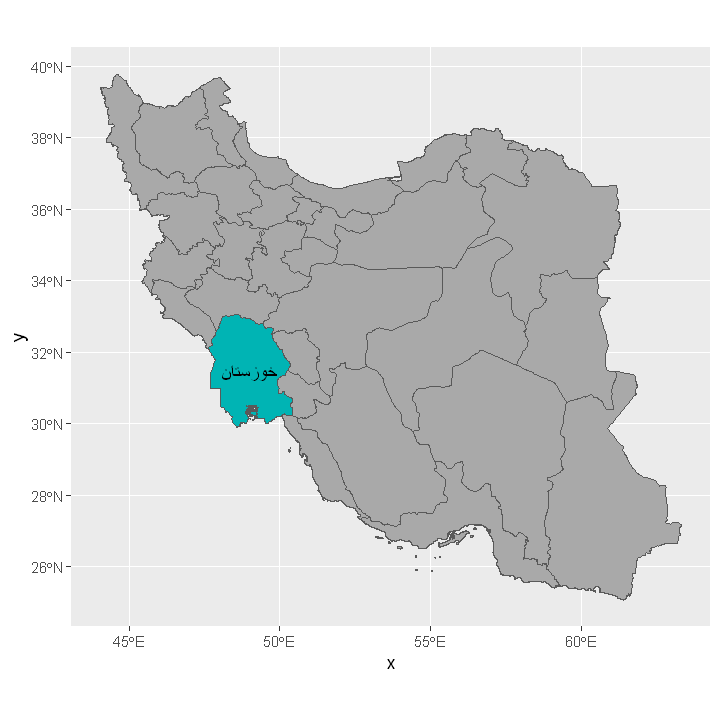

In [11]:
options(repr.plot.width = 6, repr.plot.height = 6)
sf <- st_read(dsn='D:\\Visualization-and-Data-Analyzing-2-master\\adm', layer="IRN_adm1")
shape <- readOGR(dsn='D:\\Visualization-and-Data-Analyzing-2-master\\adm', layer="IRN_adm1")

pt_centroid<-sf %>% sf::st_centroid()
pts<-st_coordinates(pt_centroid)
p<-cbind(pts,pt_centroid)

before = as.list(rep('',14))
middle = list('خوزستان')
after = as.list(rep('',16))
labels = c(before,middle,after)

before = as.list(rep('darkgrey',14))
middle = list('#00b4b4')
after = as.list(rep('darkgrey',16))
colors = c(before,middle,after)

ggplot(sf) + 
    geom_sf(data = sf, aes(fill = colors)) + 
    theme(legend.position="none")+
    geom_sf_text(aes(label = labels),size=4)
     

Reading layer `IRN_adm2' from data source 
  `D:\Visualization-and-Data-Analyzing-2-master\adm' using driver `ESRI Shapefile'
Simple feature collection with 268 features and 11 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 44.04726 ymin: 25.05875 xmax: 63.31746 ymax: 39.77722
Geodetic CRS:  WGS 84


Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"
Warning message:
"OGR support is provided by the sf and terra packages among others"


OGR data source with driver: ESRI Shapefile 
Source: "D:\Visualization-and-Data-Analyzing-2-master\adm", layer: "IRN_adm2"
with 268 features
It has 11 fields
Integer64 fields read as strings:  ID_0 ID_1 ID_2 


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
"st_point_on_surface may not give correct results for longitude/latitude data"


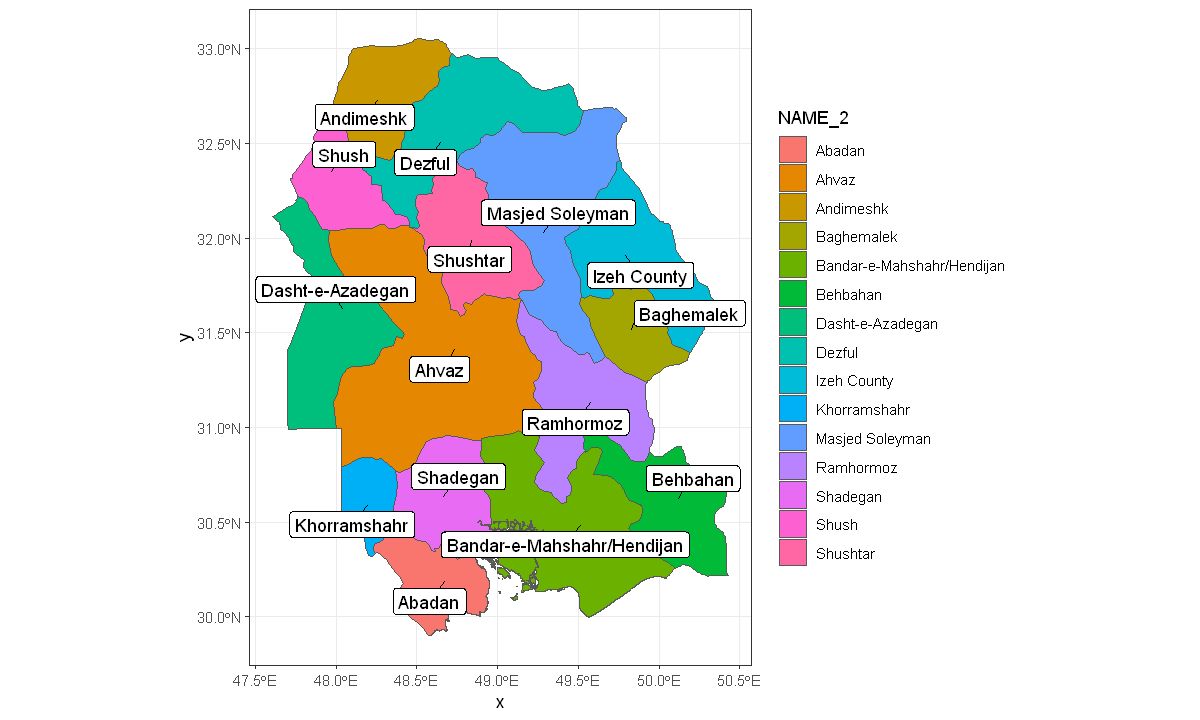

In [12]:
options(repr.plot.width = 10, repr.plot.height = 6)
sf <- st_read(dsn='D:\\Visualization-and-Data-Analyzing-2-master\\adm' , layer = "IRN_adm2")
sf <- sf[sf$NAME_1 == 'Khuzestan', ]
shape <- readOGR(dsn='D:\\Visualization-and-Data-Analyzing-2-master\\adm' , layer = "IRN_adm2")
hape = shape[shape@data$ID_1 == 15,]

ggplot(sf) +
    geom_sf(aes(fill = NAME_2)) +
    ggrepel::geom_label_repel(
    data = sf,
    aes(label = NAME_2, geometry = geometry),
    stat = "sf_coordinates",
    min.segment.length = 0
      ) +
    theme_bw()

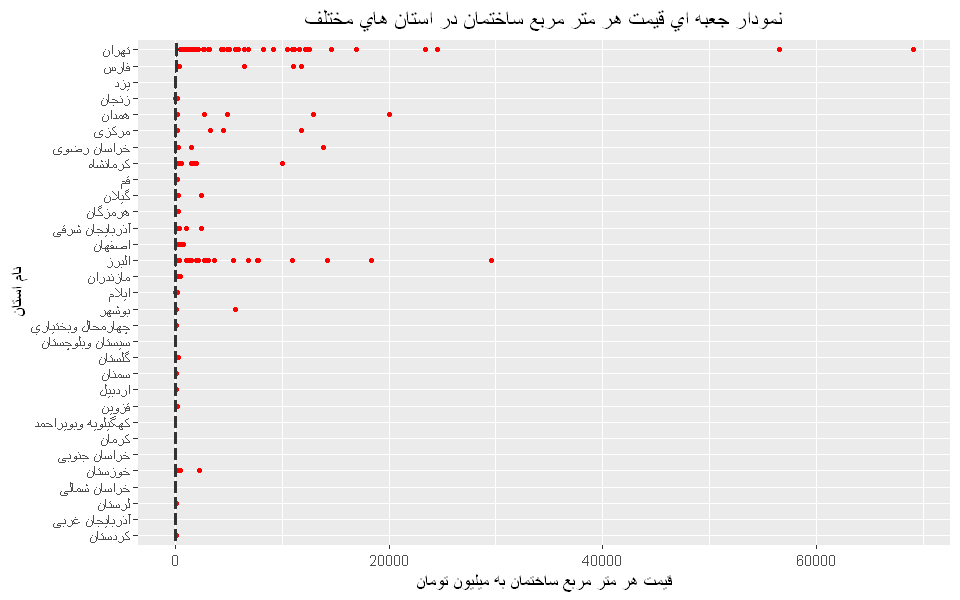

In [13]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data, aes(x=price_per_square, y=reorder(state, price_per_square, FUN=median) , fill=state)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در استان های مختلف", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام استان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

Warning message:
"Removed 6945 rows containing non-finite values (`stat_boxplot()`)."


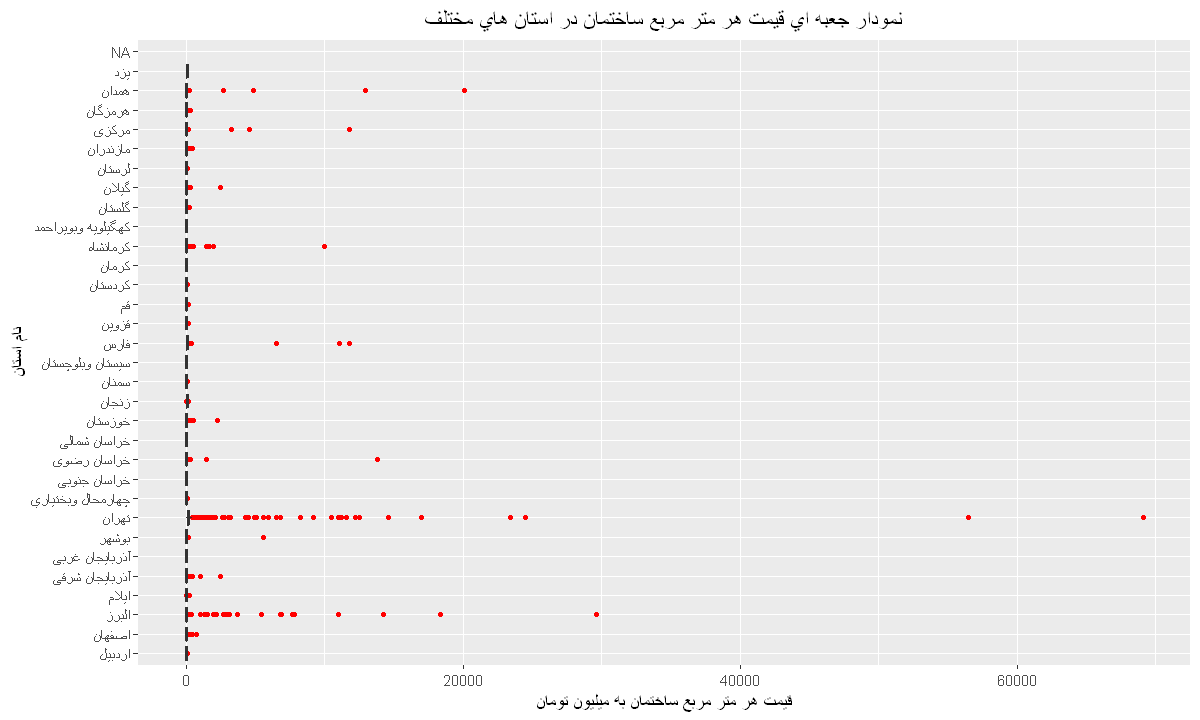

In [62]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(data, aes(x=price_per_square, y=state , fill=state)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در استان های مختلف", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام استان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

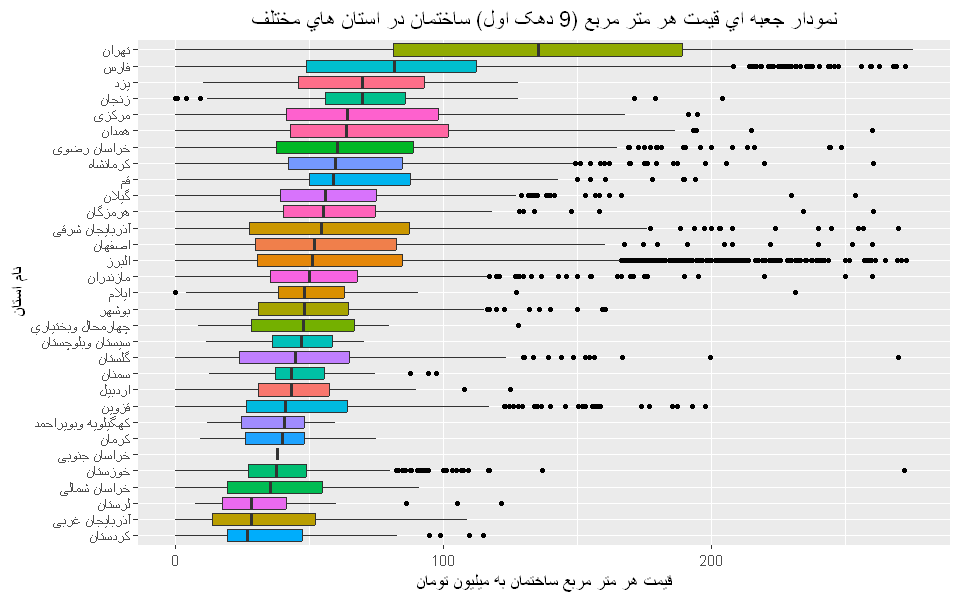

In [17]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data[data$price_per_square < quantile(data$price_per_square, 0.9),],
      aes(x=price_per_square, y=reorder(state, price_per_square, FUN=median) , fill=state)) + 
      geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=1) +
      labs(title="نمودار جعبه ای قیمت هر متر مربع (9 دهک اول) ساختمان در استان های مختلف", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام استان") +
      theme(legend.position="none",plot.title = element_text(hjust = 0.5)
      )

In [19]:
head(data)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000,36.14458,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080,12.00000,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000,204.08163,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240,40.03955,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750,9.37500,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500,55.00000,0,بتوني,1399/04/01,381333


In [20]:
khoozestan = data[data$state == 'خوزستان',]

In [21]:
dim(khoozestan)

[1] 768  15

In [22]:
df<-khoozestan %>%
    select('city','area','building_age','skeleton_type','price','price_per_square')

In [23]:
df = dummy_cols(df, select_columns = c('city', 'skeleton_type'),remove_selected_columns = TRUE)

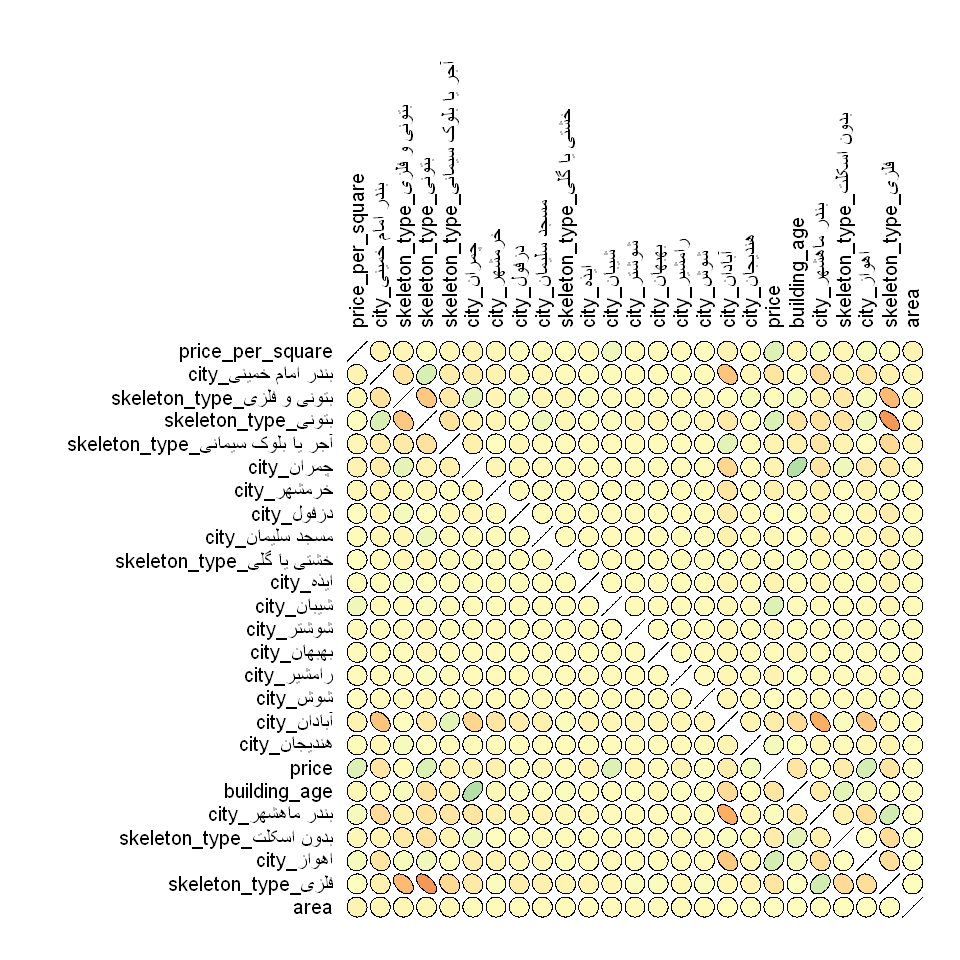

In [24]:
options(repr.plot.width = 8, repr.plot.height = 8)
data <- cor(df)
 
# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors <- colorRampPalette(my_colors)(100)
 
# Order the correlation matrix
ord <- order(data[1, ])
data_ord <- data[ord, ord]
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(0,0,0,0))

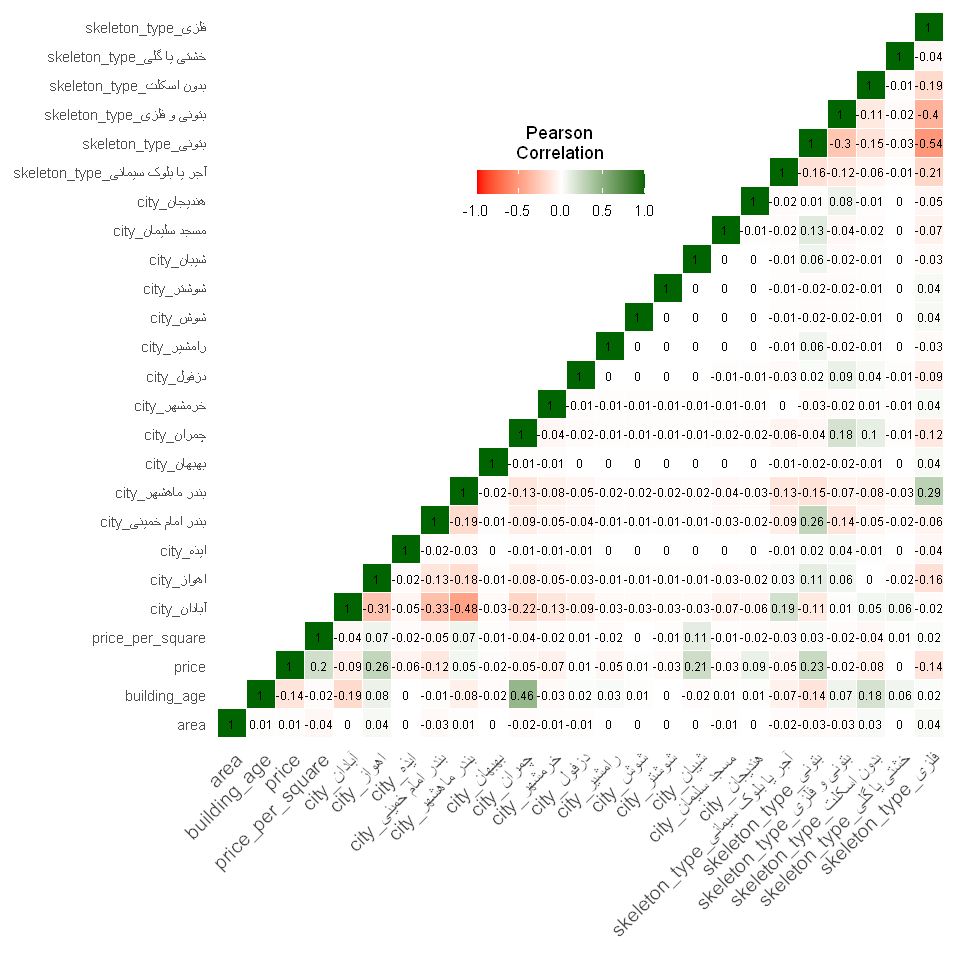

In [25]:
options(repr.plot.width = 8, repr.plot.height = 8)
cormat = round(cor(df),2)
melted_cormat <- melt(cormat)
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "red", high = "darkgreen", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()
# Print the heatmap
ggheatmap + geom_text(aes(Var2, Var1, label = value), color = "black", size = 2.5) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

# print(ggheatmap)

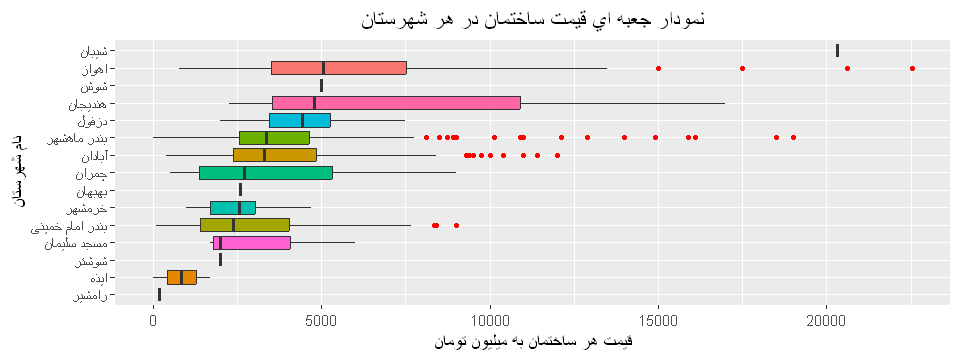

In [26]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price, y=reorder(city, price, FUN=median) , fill=city)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت ساختمان در هر شهرستان", x="قیمت هر ساختمان به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none", plot.title = element_text(hjust = 0.5))

Warning message:
"Using `size` aesthetic for lines was
deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


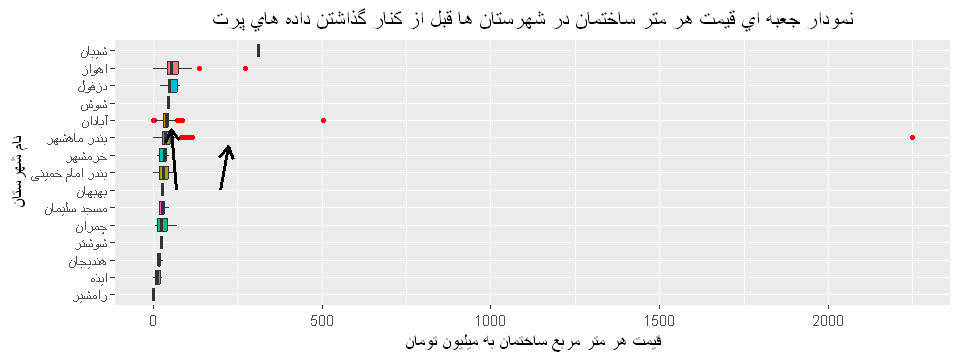

In [27]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price_per_square, y=reorder(city, price_per_square, FUN=median) , fill=city)) + 
geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
labs(title="نمودار جعبه ای قیمت هر متر ساختمان در شهرستان ها قبل از کنار گذاشتن داده های پرت", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام شهرستان") +
geom_segment(aes(x = 200, y = 7, xend = 222, yend = 9.5),size = 1,arrow = arrow(length = unit(.3, "cm"))) +
geom_segment(aes(x = 70, y = 7, xend = 53, yend = 10.5),size = 1,arrow = arrow(length = unit(.3, "cm"))) +
theme(legend.position="none",plot.title = element_text(hjust = 0.5))

In [28]:
tail(khoozestan[khoozestan$city == 'بندر ماهشهر',][order(khoozestan[khoozestan$city == 'بندر ماهشهر',]$price_per_square),])

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19062589,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,158.38,100,15900,100.3915,9,بتوني,1399/04/02,635171
19114851,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,2,مسکوني,147.00,100,14900,101.3605,0,فلزي,1399/04/10,635190
19219922,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,112.65,100,12120,107.5899,2,فلزي,1399/04/28,635162
19138717,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,99.55,100,10900,109.4927,0,بتوني,1399/04/15,635165
19211408,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,158.38,100,18500,116.8077,1,بتوني,1399/04/25,635160
19189198,مبايعه نامه,خوزستان,بندر ماهشهر,دستگاه آپارتمان,NA,مسکوني,1.00,100,2250,2250.0000,9,فلزي,1399/04/22,635111


In [29]:
khoozestan = khoozestan[khoozestan$contrat_number != 19189198,]

In [30]:
tail(khoozestan[khoozestan$city == 'آبادان',][order(khoozestan[khoozestan$city == 'آبادان',]$price_per_square),])

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19098290,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,72.80,100,5600,76.92308,26,خشتي يا گلي,1399/04/08,631878
19137065,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,1,مسکوني,95.00,100,7526,79.22105,0,بتوني و فلزي,1399/04/14,631688
19121319,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,130.00,100,10400,80.00000,1,بتوني,1399/04/11,631687
19136908,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,73.23,100,6300,86.03032,4,بتوني و فلزي,1399/04/14,631586
19188748,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,NA,مسکوني,73.77,100,6500,88.11170,8,فلزي,1399/04/22,631481
19236303,مبايعه نامه,خوزستان,آبادان,دستگاه آپارتمان,2,مسکوني,10.16,100,5130,504.92126,2,فلزي,1399/04/30,631472


In [31]:
khoozestan = khoozestan[khoozestan$contrat_number != 19236303,]

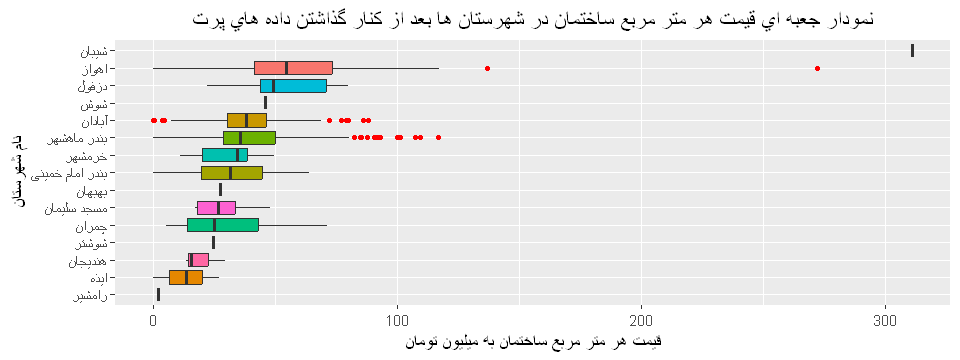

In [32]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price_per_square, y=reorder(city, price_per_square, FUN=median) , fill=city)) + 
geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در شهرستان ها بعد از کنار گذاشتن داده های پرت", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام شهرستان") +
theme(legend.position="none",plot.title = element_text(hjust = 0.5))

In [33]:
confidence_level <- khoozestan %>%
    select(city) %>%
    group_by(city) %>%
    count() %>%
    arrange(n)

In [34]:
confidence_level

city,n
<chr>,<int>
بهبهان,1
رامشير,1
شوش,1
شوشتر,1
شيبان,1
ايذه,2
هنديجان,3
مسجد سليمان,5
دزفول,8


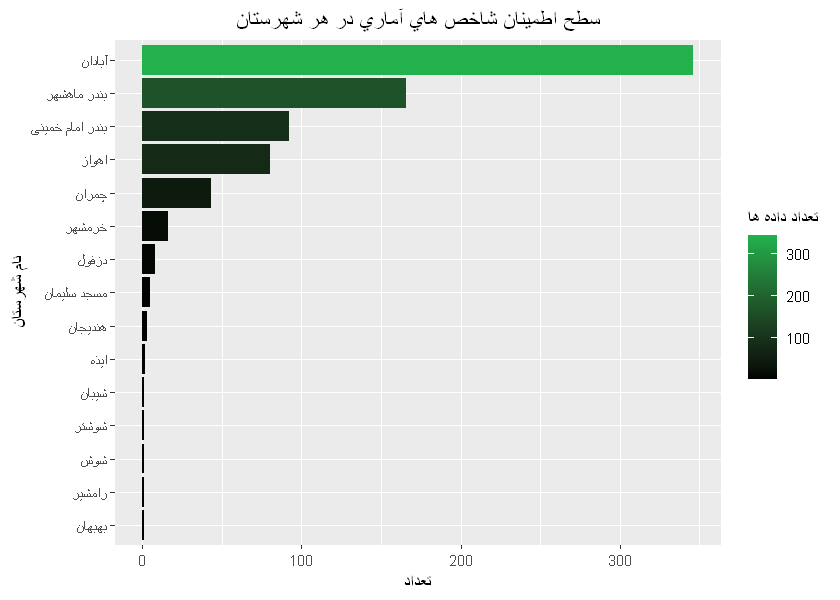

In [35]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(confidence_level , aes(x=n , y=reorder(city,n), fill = n)) + 
    geom_bar(stat = "identity") + 
    labs(title="سطح اطمینان شاخص های آماری در هر شهرستان", x="تعداد", y = "نام شهرستان") +
    scale_fill_gradient(name = "تعداد داده ها",low="black", high="#22b14d") +
    theme(plot.title = element_text(hjust = 0.5))

In [36]:
khoozestan = khoozestan[!khoozestan$city %in% list('بهبهان','رامشير','شوش','شيبان','ايذه','هنديجان','مسجد سليمان','دزفول','شوشتر'),]

In [37]:
confidence_level <- khoozestan %>%
    select(city) %>%
    group_by(city) %>%
    count() %>%
    arrange(n)

In [38]:
confidence_level

city,n
<chr>,<int>
خرمشهر,16
چمران,43
اهواز,80
بندر امام خميني,92
بندر ماهشهر,166
آبادان,346


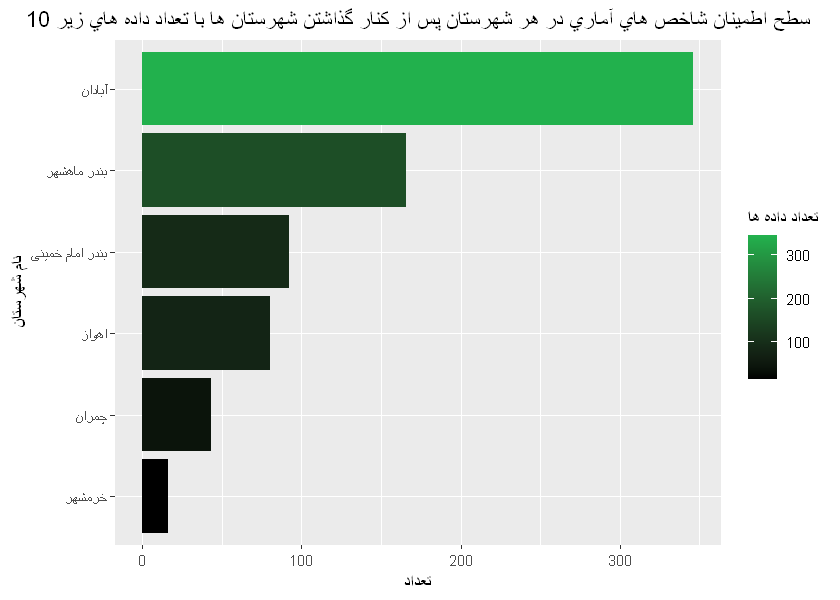

In [39]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(confidence_level , aes(x=n , y=reorder(city,n), fill = n)) + 
    geom_bar(stat = "identity") + 
    labs(title="سطح اطمینان شاخص های آماری در هر شهرستان پس از کنار گذاشتن شهرستان ها با تعداد داده های زیر 10", x="تعداد", y = "نام شهرستان") +
    scale_fill_gradient(name = "تعداد داده ها",low="black", high="#22b14d") +
    theme(plot.title = element_text(hjust = 0.5))

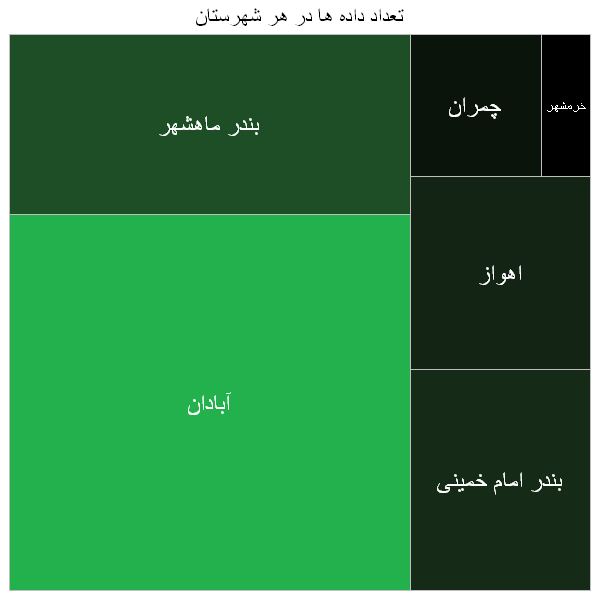

In [40]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(confidence_level, aes(area = n, fill = n,label = city)) +
    geom_treemap() +
    geom_treemap_text(colour = "white",size = 15, place = "centre",grow = FALSE) +
    labs(title="تعداد داده ها در هر شهرستان") +
    scale_fill_gradient(name = "تعداد داده ها",low="black", high="#22b14d") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

In [41]:
df <- khoozestan %>%
    select(city,price) %>%
    group_by(city) %>%
    summarise(mean_price = mean(price))
df

city,mean_price
<chr>,<dbl>
آبادان,3780.111
اهواز,6234.250
بندر امام خميني,3096.426
بندر ماهشهر,4319.117
خرمشهر,2599.812
چمران,3445.581


In [44]:
reorder(df$city, df$mean_price)

[1] آبادان          اهواز           بندر امام خميني بندر ماهشهر    
[5] خرمشهر          چمران          
attr(,"scores")
          اهواز          آبادان بندر امام خميني     بندر ماهشهر           چمران 
       6234.250        3780.111        3096.426        4319.117        3445.581 
         خرمشهر 
       2599.812 
Levels: خرمشهر بندر امام خميني چمران آبادان بندر ماهشهر اهواز

In [55]:
confidence_level$city

[1] "خرمشهر"          "چمران"           "اهواز"           "بندر امام خميني"
[5] "بندر ماهشهر"     "آبادان"

In [60]:
df <- khoozestan %>%
    select(city,price_per_square) %>%
    group_by(city) %>%
    summarise(mean_price_per_square = mean(price_per_square))
df

city,mean_price_per_square
<chr>,<dbl>
آبادان,38.39624
اهواز,60.02169
بندر امام خميني,31.95575
بندر ماهشهر,41.27006
خرمشهر,30.95103
چمران,29.49167


Picking joint bandwidth of 6.19



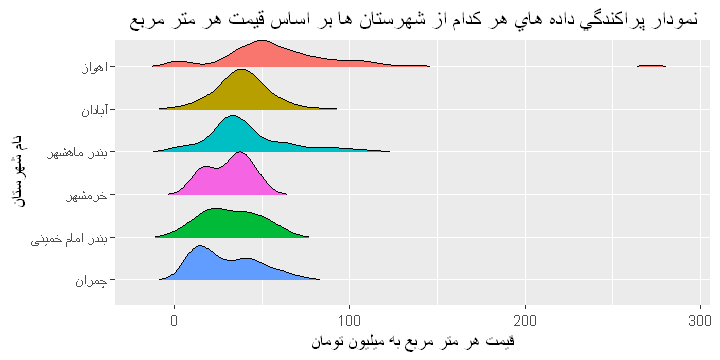

In [62]:
options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(khoozestan, aes(x = price_per_square, y = reorder(city, price_per_square, FUN=median), fill = city)) +
  geom_density_ridges_gradient(scale = 1, rel_min_height = 0.01) +
    labs(title="نمودار پراکندگی داده های هر کدام از شهرستان ها بر اساس قیمت هر متر مربع", x="قیمت هر متر مربع به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

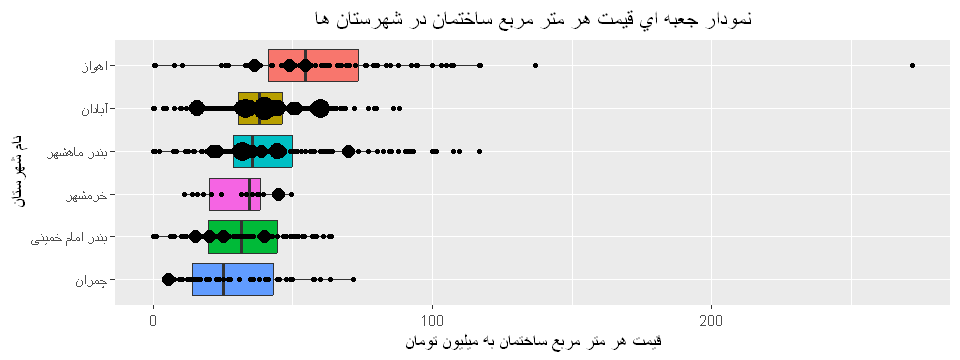

In [63]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price_per_square, y=reorder(city, price_per_square, FUN=median) , fill=city)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    geom_count(col="black", show.legend=F)+
    labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در شهرستان ها", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))
     

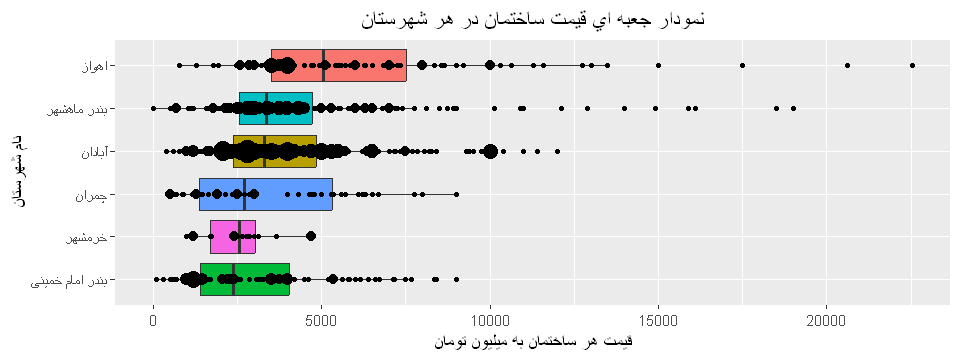

In [64]:
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(khoozestan, aes(x=price, y=reorder(city, price, FUN=median) , fill=city)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=16,outlier.size=1) +
    geom_count(col="black", show.legend=F)+
    labs(title="نمودار جعبه ای قیمت ساختمان در هر شهرستان", x="قیمت هر ساختمان به میلیون تومان", y = "نام شهرستان") +
    theme(legend.position="none",plot.title = element_text(hjust = 0.5))

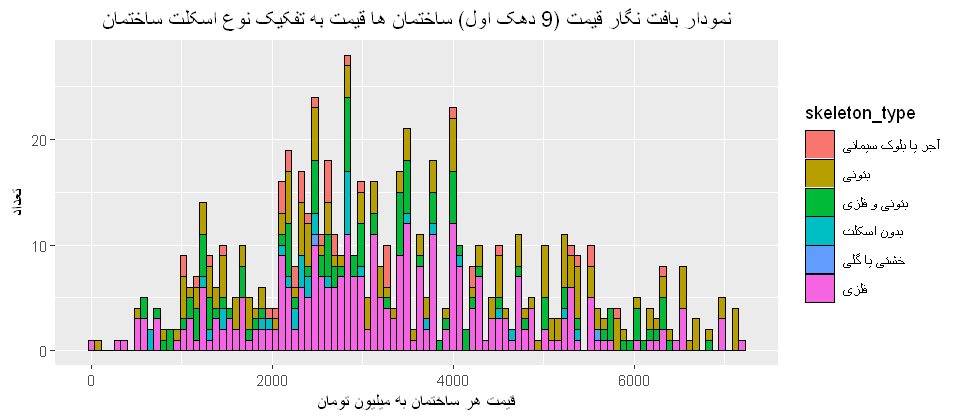

In [65]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan[khoozestan$price < quantile(khoozestan$price, 0.9), ], aes(price)) + 
#     geom_histogram(aes(fill=skeleton_type), binwidth = 100,col='black', size=.1) +
    geom_histogram(aes(fill=skeleton_type), bins=100, col="black", size=.1) +
    labs(title="نمودار بافت نگار قیمت (9 دهک اول) ساختمان ها قیمت به تفکیک نوع اسکلت ساختمان", x="قیمت هر ساختمان به میلیون تومان", y = "تعداد")+
    theme(plot.title = element_text(hjust = 0.5))

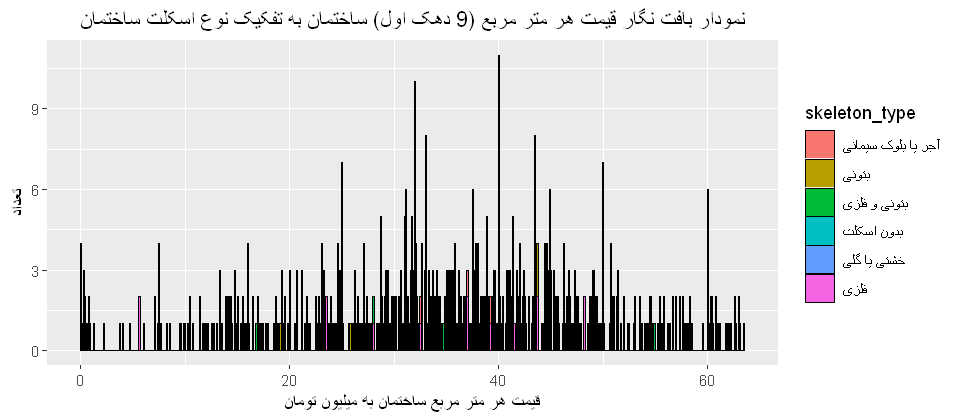

In [66]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan[khoozestan$price_per_square < quantile(khoozestan$price_per_square, 0.9), ], aes(price_per_square)) +
    geom_histogram(aes(fill=skeleton_type), binwidth = 0.1,col='black', size=.1) +
#     geom_histogram(aes(fill=skeleton_type), bins=100, col="black", size=.1) +
    labs(title="نمودار بافت نگار قیمت هر متر مربع (9 دهک اول) ساختمان به تفکیک نوع اسکلت ساختمان", x="قیمت هر متر مربع ساختمان به میلیون تومان", y = "تعداد")+
    theme(plot.title = element_text(hjust = 0.5))

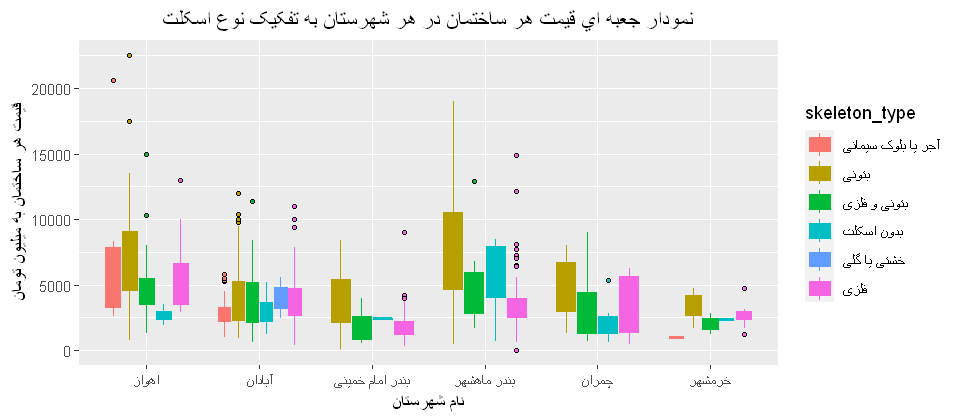

In [67]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan, aes(x=city, y=price , fill = skeleton_type)) + 
    geom_boxplot(aes(colour = skeleton_type) ,outlier.colour="black", outlier.shape=21,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر ساختمان در هر شهرستان به تفکیک نوع اسکلت", y="قیمت هر ساختمان به میلیون تومان", x = "نام شهرستان") +
    theme(plot.title = element_text(hjust = 0.5))

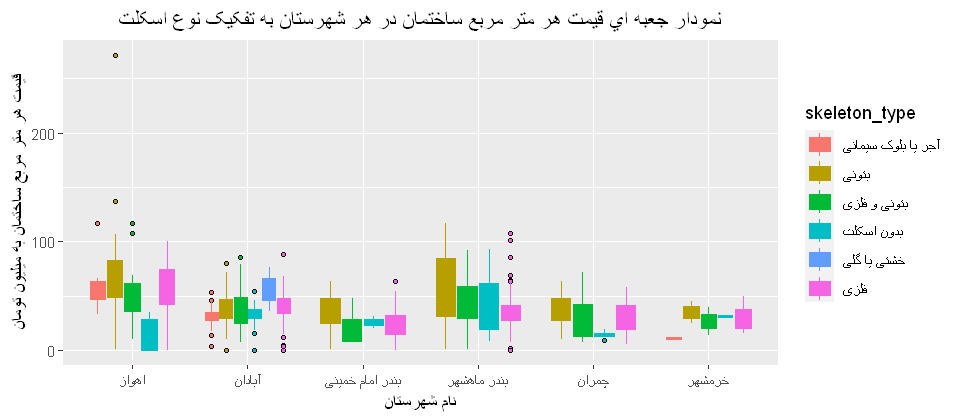

In [68]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
ggplot(khoozestan, aes(x=city, y=price_per_square , fill = skeleton_type)) + 
    geom_boxplot(aes(colour = skeleton_type) ,outlier.colour="black", outlier.shape=21,outlier.size=1) +
    labs(title="نمودار جعبه ای قیمت هر متر مربع ساختمان در هر شهرستان به تفکیک نوع اسکلت", y="قیمت هر متر مربع ساختمان به میلیون تومان", x = "نام شهرستان") +
    theme(plot.title = element_text(hjust = 0.5))

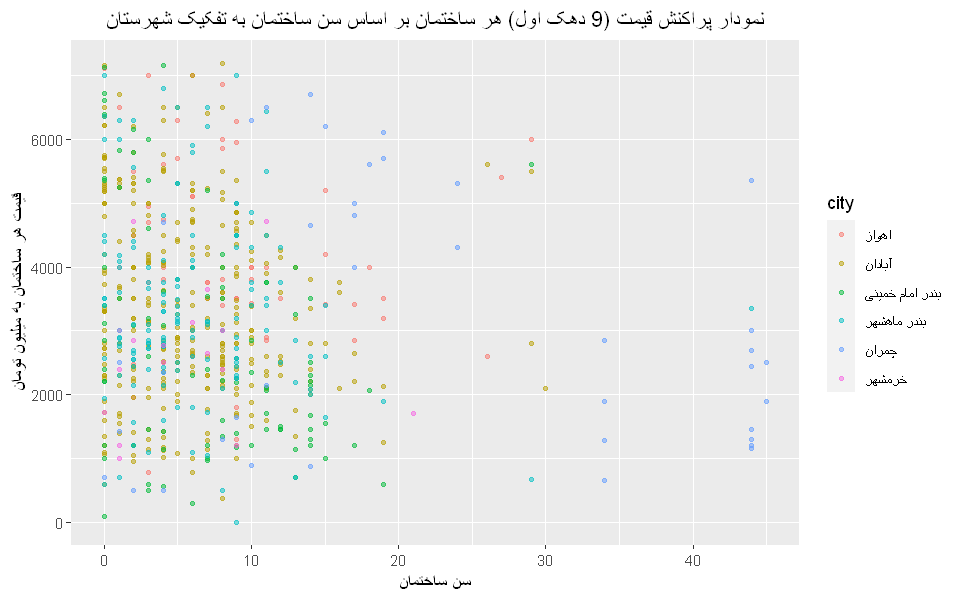

In [69]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[khoozestan$price < quantile(khoozestan$price, 0.9), ], aes(x=building_age, y=price , color = city)) + 
    geom_point(size=1,alpha=0.5) +
    labs(title="نمودار پراکنش قیمت (9 دهک اول) هر ساختمان بر اساس سن ساختمان به تفکیک شهرستان", x="سن ساختمان", y = "قیمت هر ساختمان به میلیون تومان") +
    theme(plot.title = element_text(hjust = 0.5))

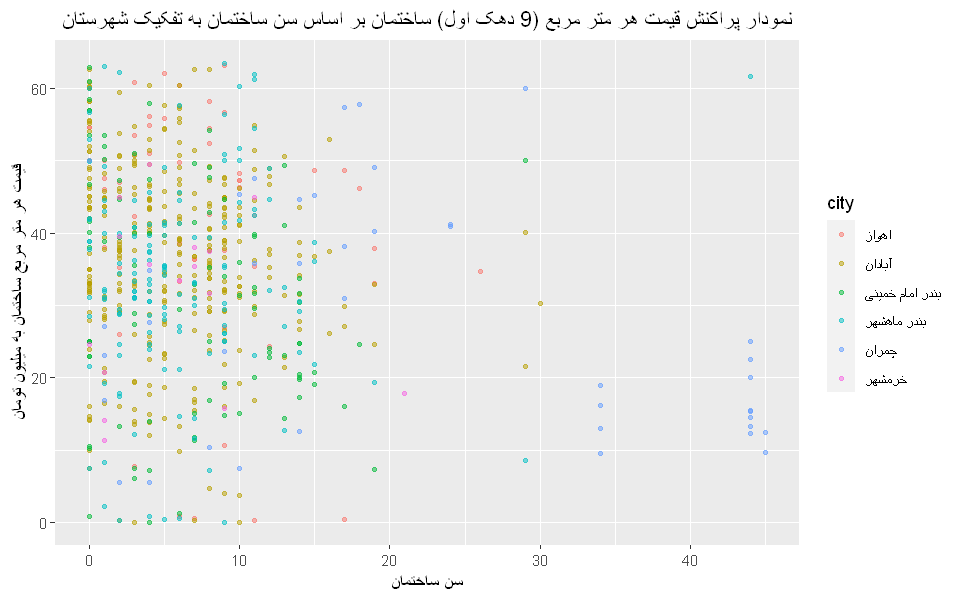

In [71]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[khoozestan$price_per_square < quantile(khoozestan$price_per_square, 0.9), ],aes(x=building_age, y=price_per_square , color = city)) + 
    geom_point(size=1,alpha=0.5) +
    labs(title="نمودار پراکنش قیمت هر متر مربع (9 دهک اول) ساختمان بر اساس سن ساختمان به تفکیک شهرستان", 
    x="سن ساختمان", y ="قیمت هر متر مربع ساختمان به میلیون تومان") +
    theme(plot.title = element_text(hjust = 0.5))

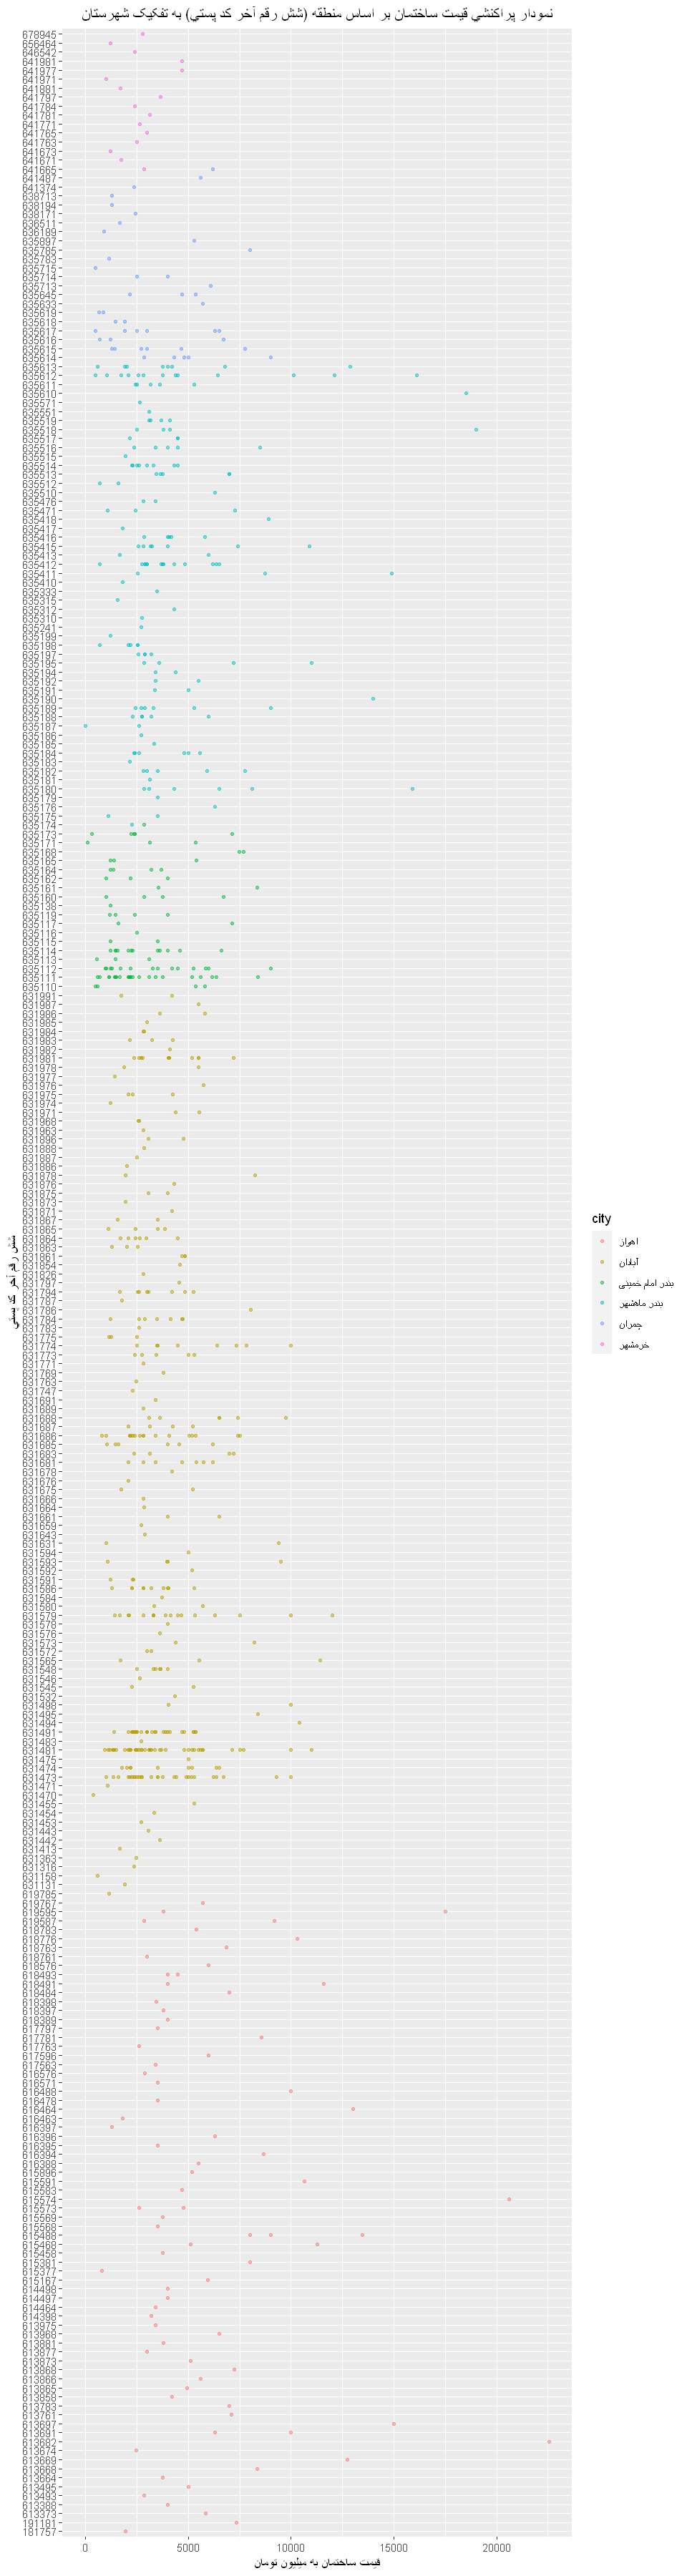

In [72]:
options(repr.plot.width = 8, repr.plot.height = 30)
ggplot(khoozestan, aes(x=price, y=postal_code[order(postal_code)] , color = city)) + 
    geom_point(size=1,alpha=0.5) +
    labs(title="نمودار پراکنشی قیمت ساختمان بر اساس منطقه (شش رقم آخر کد پستی) به تفکیک شهرستان", y="شش رقم آخر کد پستی", x = "قیمت ساختمان به میلیون تومان")+
    theme(plot.title = element_text(hjust = 0.5))

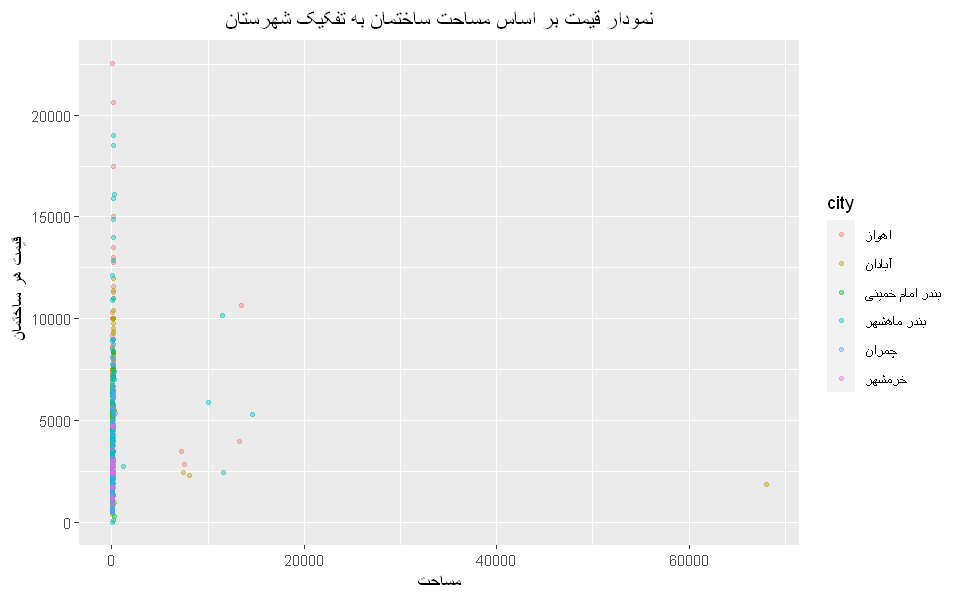

In [73]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan, aes(x=area, y=price , color = city)) +
    geom_point(size=1,alpha=0.4,) +
    labs(title="نمودار قیمت بر اساس مساحت ساختمان به تفکیک شهرستان", y=" قیمت هر ساختمان", x = "مساحت")+
    theme(plot.title = element_text(hjust = 0.5))

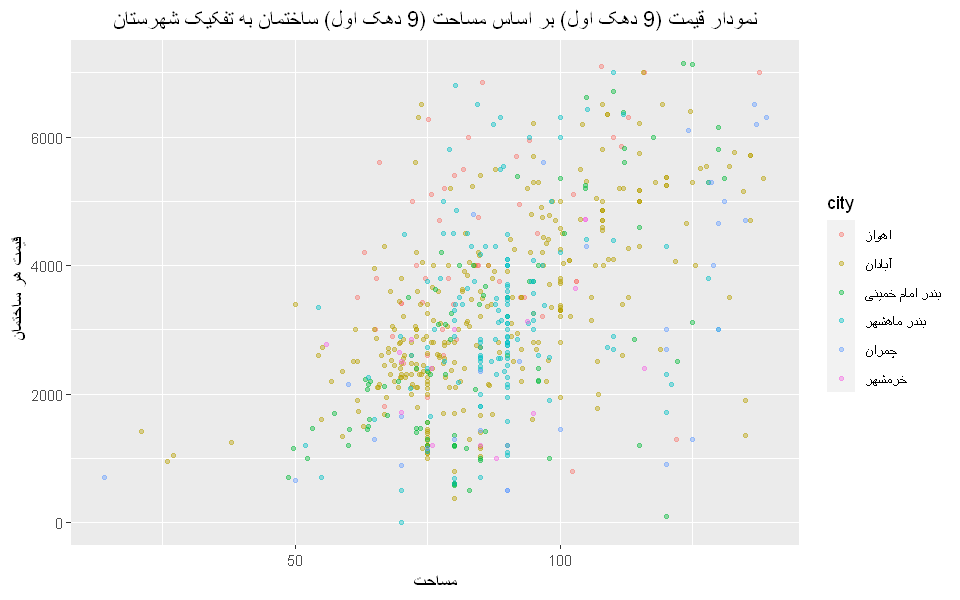

In [80]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[(khoozestan$area < quantile(khoozestan$area, 0.9)) & (khoozestan$price<quantile(khoozestan$price,0.9)),], aes(y=price, x=area , color = city)) +
    geom_point(size=1,alpha=0.4,) +
    labs(title="نمودار قیمت (9 دهک اول) بر اساس مساحت (9 دهک اول) ساختمان به تفکیک شهرستان", y=" قیمت هر ساختمان", x = "مساحت")+
    theme(plot.title = element_text(hjust = 0.5))

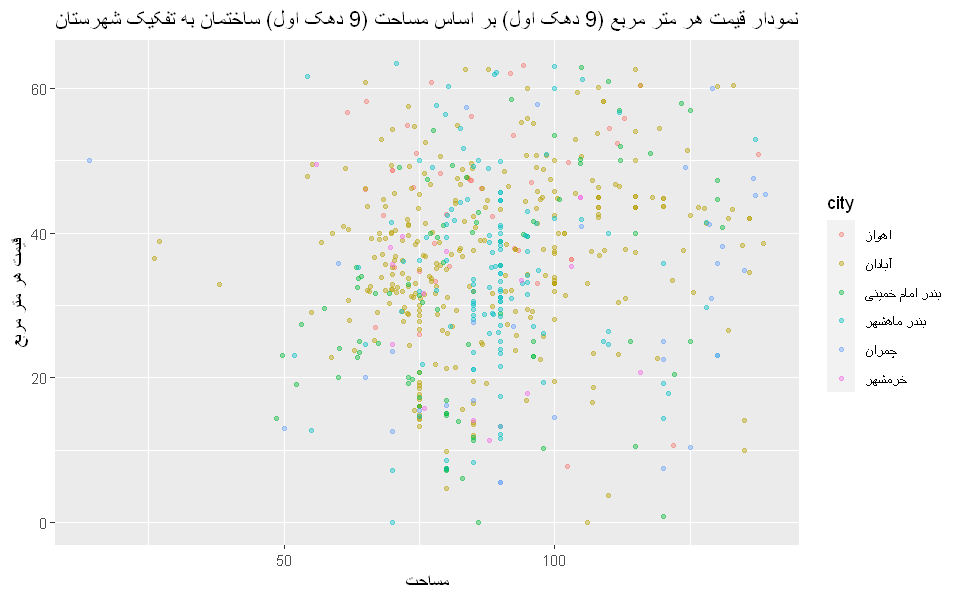

In [81]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(khoozestan[(khoozestan$area < quantile(khoozestan$area,0.9)) &
                  (khoozestan$price_per_square < quantile(khoozestan$price_per_square, 0.9)),],
    aes(y=price_per_square, x=area , color = city)) +
    geom_point(size=1,alpha=0.4,) +
    labs(title="نمودار قیمت هر متر مربع (9 دهک اول) بر اساس مساحت (9 دهک اول) ساختمان به تفکیک شهرستان", y="قیمت هر متر مربع", x = "مساحت")